# Apple Vs Microsoft Stock Price: From 1986 - 2025
## Objective: Analyzing and Comparing AAPL and MSFT prices

In this Jupyter notebook, you can find trends, analyses and comparisons of Apple(AAPL) and Microsoft(MSFT) stock prices. The stock price datasets were downloaded from Kaggle. We'll pandas library to clean and process the data. For visualizations we shall use Seaborn and Matplotlib.

At first, we extract our stock price data from the datasets we found on Kaggle into pandas DataFrames. Next, the data should be cleaned and there should be a new dataset with the stock closing prices and both companies joined on the price date, so that we can see the correlation between the two stocks.

Lastly, we'll visualize line plots for stock price over time, bar charts for daily returns and scatter plots for the correlation between the two stocks using Seaborn and Matplotlib.

# Findings
Apple and Microsoft have a strong and positive correlation. The daily return of Apple was more volatile and Microsoft had higher returns in the month of Nov 2024. Apples stock started rising exponentially after 2010 and Microsoft saw major rises in price after 2015.

# Analyzing and Visualizing Stock Price Data
## Setting up the enviroment

Let's import pandas, seaborn and matplotlib.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


## Loading the Data

Let's load the stock price datasets into dataframes. Let's display the first 3 rows in the datasets and also a summary to have an idea about how the data looks like. 

In [2]:
# Load Apple stock data
appl = pd.read_csv('Apple.csv')
print("Apple Stocks (First 5 days)")
print(appl.head())
print("\nApple Stocks (Last 5 days)")
print(appl.tail())

print("\nApple Stocks Info")
print(appl.info())

# Load Microsoft stock data
msft = pd.read_csv('Microsoft.csv')
print("Microsoft Stocks (First 5 days)")
print(msft.head())
print("\nMicrosoft Stocks (Last 5 days)")
print(msft.tail())

print("\nMicrosoft Stocks Info")
print(msft.info())

Apple Stocks (First 5 days)
   Unnamed: 0  Adj Close     Close      High       Low      Open     Volume
0  1980-12-12   0.098834  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15   0.093678  0.121652  0.122210  0.121652  0.122210  175884800
2  1980-12-16   0.086802  0.112723  0.113281  0.112723  0.113281  105728000
3  1980-12-17   0.088951  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18   0.091530  0.118862  0.119420  0.118862  0.118862   73449600

Apple Stocks (Last 5 days)
       Unnamed: 0   Adj Close       Close        High         Low        Open  \
11102  2024-12-27  255.589996  255.589996  258.700012  253.059998  257.829987   
11103  2024-12-30  252.199997  252.199997  253.500000  250.750000  252.229996   
11104  2024-12-31  250.419998  250.419998  253.279999  249.429993  252.440002   
11105  2025-01-02  243.850006  243.850006  249.100006  241.820007  248.929993   
11106  2025-01-03  243.860001  243.860001  244.179993  241.889999  243.369995   

 

## Preprocessing and Cleaning the Data

Let's remove duplicates, fill missing values, handle wrong formats and merge the datasets. The date column of the Apple dataset is unnamed, we should give it an appropriate name. Fortunately, there are no missing values but the date columns have the wrong format, so we need to convert them to datetime type. We should calculatethe daily returns for each day. And also the datasets have different date ranges, so we should only merge the rows that have the same dates and drop the rest.

In [3]:
# Check for duplicates
duplicates_count_apple = appl.duplicated().sum()
duplicates_count_microsoft = msft.duplicated().sum()

# Show the number of duplicates
print("Duplicate Count")
print("Apple Dataset", duplicates_count_apple)
print("Microsoft Dataset", duplicates_count_microsoft)

# If there are duplicates, remove them
if duplicates_count_apple > 0:
    appl.drop_duplicates(inplace=True)

if duplicates_count_microsoft > 0:
    msft.drop_duplicates(inplace=True)

# Assign an appropriate column name
appl.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Convert date column to datetime type
appl['Date'] = pd.to_datetime(appl['Date'])
msft['Date'] = pd.to_datetime(msft['Date'])

# Calculate daily returns
appl['DailyReturn'] = appl['Close'].pct_change()
appl.loc[0, 'DailyReturn'] = (appl['Close'].iloc[0] - appl['Open'].iloc[0]) / appl['Open'].iloc[0]

msft['DailyReturn'] = msft['Close'].pct_change()
msft.loc[0, 'DailyReturn'] = (msft['Close'].iloc[0] - msft['Open'].iloc[0]) / msft['Open'].iloc[0]

print("Apple Stocks (First 5 days)")
print(appl.head())

print("\nApple Stocks Info")
print(appl.info())

print("\nMicrosoft Stocks (First 5 days)")
print(msft.head())

print("\nMicrosoft Stocks Info")
print(msft.info())

# Merge datasets to create a scatter plot
# to show correlation between the two stocks
stocks_data = pd.merge(appl, msft, on='Date', how='inner', suffixes=('_appl', '_msft'))

print("Stocks (First 5 days)")
print(stocks_data.head())

print("Stocks (Last 5 days)")
print(stocks_data.tail())

print("\nStocks Info")
print(stocks_data.info())

Duplicate Count
Apple Dataset 0
Microsoft Dataset 0
Apple Stocks (First 5 days)
        Date  Adj Close     Close      High       Low      Open     Volume  \
0 1980-12-12   0.098834  0.128348  0.128906  0.128348  0.128348  469033600   
1 1980-12-15   0.093678  0.121652  0.122210  0.121652  0.122210  175884800   
2 1980-12-16   0.086802  0.112723  0.113281  0.112723  0.113281  105728000   
3 1980-12-17   0.088951  0.115513  0.116071  0.115513  0.115513   86441600   
4 1980-12-18   0.091530  0.118862  0.119420  0.118862  0.118862   73449600   

   DailyReturn  
0     0.000000  
1    -0.052171  
2    -0.073398  
3     0.024751  
4     0.028992  

Apple Stocks Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         11107 non-null  datetime64[ns]
 1   Adj Close    11107 non-null  float64       
 2   Close        11107 no

# Visualizing the Data

Let's create line plots for stock prices over time, bar charts for daily returns, scatter plot for correlation between the two stock prices.


Apple Stock Price Trend



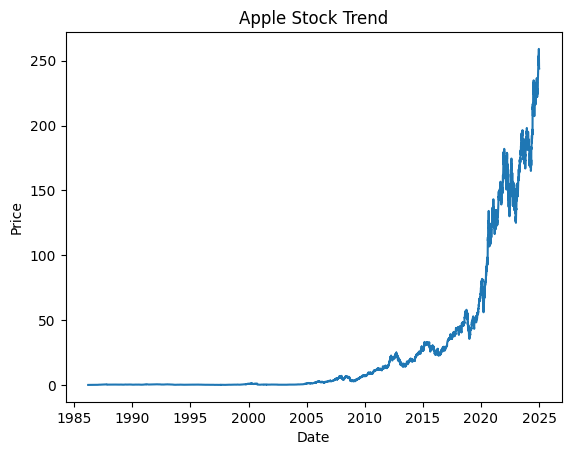


Microsoft Stock Price Trend



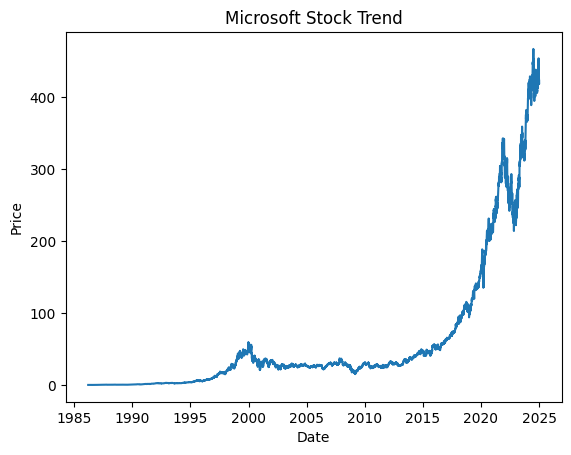


Apple Daily returns for Nov 2024



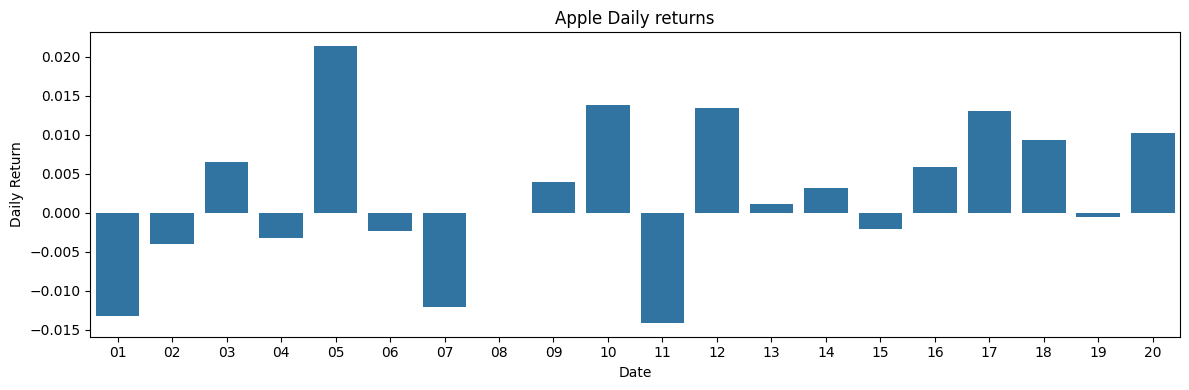


Microsoft Daily returns for Nov 2024



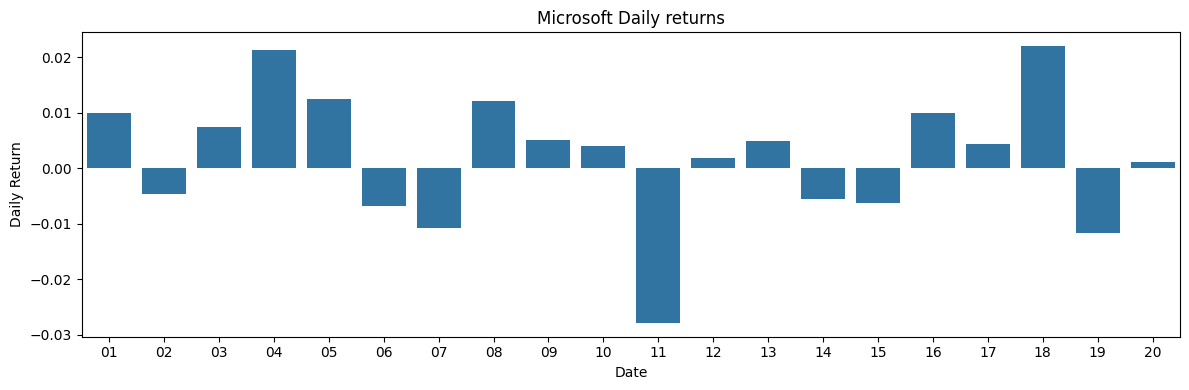


Correlation between Appel and Microsoft Stock Price



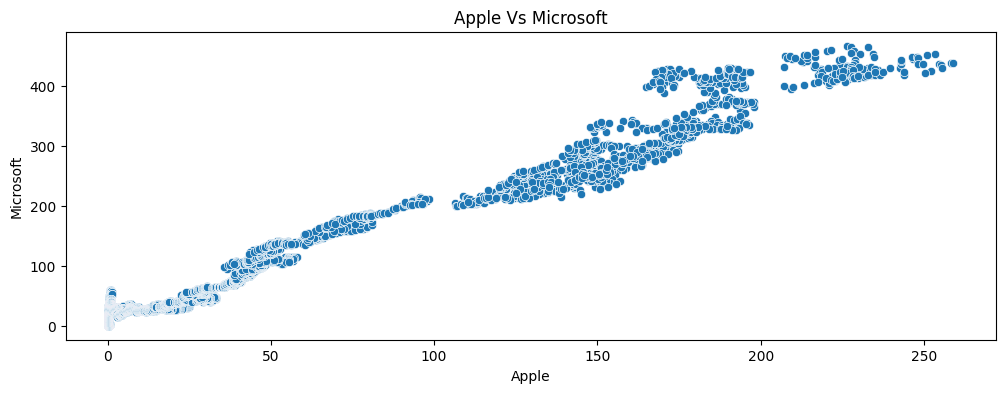

In [4]:
print("\nApple Stock Price Trend\n")
# Plot the stock prices over time
sns.lineplot(data=stocks_data, x='Date', y='Close_appl')
plt.title("Apple Stock Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

print("\nMicrosoft Stock Price Trend\n")
sns.lineplot(data=stocks_data, x='Date', y='Close_msft')
plt.title("Microsoft Stock Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Plot the daily returns of Nov 2024
print("\nApple Daily returns for Nov 2024\n")
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(data=stocks_data[(stocks_data['Date'].dt.year == 2024) & (stocks_data['Date'].dt.month == 11)], x='Date', y='DailyReturn_appl', ax=ax)
plt.title("Apple Daily returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")

day_formatter = mdates.DateFormatter('%d')

ax.xaxis.set_major_formatter(day_formatter)

plt.tight_layout()
plt.show()

print("\nMicrosoft Daily returns for Nov 2024\n")
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(data=stocks_data[(stocks_data['Date'].dt.year == 2024) & (stocks_data['Date'].dt.month == 11)], x='Date', y='DailyReturn_msft', ax=ax)
plt.title("Microsoft Daily returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")

ax.xaxis.set_major_formatter(day_formatter)

plt.tight_layout()
plt.show()

# Plot correlation between stocks
print("\nCorrelation between Appel and Microsoft Stock Price\n")
fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(data=stocks_data, x='Close_appl', y='Close_msft', ax=ax)
plt.title("Apple Vs Microsoft")
plt.xlabel("Apple")
plt.ylabel("Microsoft")
plt.show()